In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
plt.style.use('seaborn')

#read the csv file
data_dent=pd.read_csv(r'C:/MEPS/data.csv',sep=',')
#Find out the column with na >20000, drop them
tmp_colum = []
for col in data_dent:
    if (data_dent[col].isnull().values.sum())> 20000:
        tmp_colum.append(col)
data_dent_clean = data_dent.drop(tmp_colum,axis=1)  
#Input the vaiable list
Dent_type = [
                             "DENTAL HYGIENIST SEEN",
                             "DENTAL SURGEON SEEN",
                             "DENTAL TECHNICIAN SEEN",
                             "ENDODONTIST SEEN",
                             "GENERAL DENTIST SEEN",
                             "ORTHODONTIST SEEN",
                             "PERIODONTIST SEEN",
                             "ABSCESS OR INFECTION TREATMENT",
                             "BONDING, WHITENING, OR BLEACHING",
                             "BRIDGES",
                             "CLEANING, PROPHYLAXIS, OR POLISHING",
                             "CROWNS OR CAPS",
                             "DENTURES OR PARTIAL DENTURES",
                             "EXTRACTION, TOOTH PULLED",
                             "FILLINGS",
                             "FLUORIDE TREATMENT",
                             "GENERAL EXAM OR CONSULTATION",
                             "IMPLANTS",
                             "INLAYS",
                             "ORAL SURGERY",
                             "OTHER DENTAL PROCEDURES",
                             "OTHER DENTAL SPECIALIST SEEN",
                             "PERIODONTAL RECALL VISIT",
                             "PERIODONTAL SCALING, ROOT PLANING OR GUM",
                             "RECEIVED MEDICINE INCLUDING FREE SAMPLE",
                             "REPAIR OF BRIDGES/DENTURES OR RELINING",
                             "ROOT CANAL",
                             "SEALANT APPLICATION",
                             "TREATMENT FOR TMD OR TMJ",
                             "X-RAYS, RADIOGRAPHS OR BITEWINGS"
]

Amount_var = [
    "AMOUNT PAID, FAMILY (IMPUTED)",
    "AMOUNT PAID, MEDICAID (IMPUTED)",
    "AMOUNT PAID, MEDICARE (IMPUTED)",
    "AMOUNT PAID, OTHER FEDERAL (IMPUTED)",
    "AMOUNT PAID, OTHER INSURANCE (IMPUTED)",
    "AMOUNT PAID, OTHER PRIVATE (IMPUTED)",
    "AMOUNT PAID, OTHER PUBLIC (IMPUTED)",
    "AMOUNT PAID, PRIVATE INSURANCE (IMPUTED)",
    "AMOUNT PAID, STATE & LOCAL GOV (IMPUTED)",
    "AMOUNT PAID, WORKERS COMP (IMPUTED)"    
]

Choice = Amount_var+Dent_type

                          

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (25,27,33,36,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#create new dataframe by selecting desired columns
data_test2 = data_dent_clean[Choice]

In [3]:
#Drop any row with values not as Yes or No
data_test3 = data_test2
for i in range(len(Dent_type)):
    data_test3 = data_test3.loc[(data_test3[Dent_type[i]].astype(str) == "2 NO") | (data_test3[Dent_type[i]].astype(str)=="1 YES"),:]

In [4]:
#Drop any row with NA
data_test3 = data_test3.dropna()

In [5]:
#check the datatypes of data_test3 to see if there is abnormal value
data_test3.dtypes

AMOUNT PAID, FAMILY (IMPUTED)               float64
AMOUNT PAID, MEDICAID (IMPUTED)             float64
AMOUNT PAID, MEDICARE (IMPUTED)             float64
AMOUNT PAID, OTHER FEDERAL (IMPUTED)        float64
AMOUNT PAID, OTHER INSURANCE (IMPUTED)      float64
AMOUNT PAID, OTHER PRIVATE (IMPUTED)        float64
AMOUNT PAID, OTHER PUBLIC (IMPUTED)         float64
AMOUNT PAID, PRIVATE INSURANCE (IMPUTED)    float64
AMOUNT PAID, STATE & LOCAL GOV (IMPUTED)    float64
AMOUNT PAID, WORKERS COMP (IMPUTED)         float64
DENTAL HYGIENIST SEEN                        object
DENTAL SURGEON SEEN                          object
DENTAL TECHNICIAN SEEN                       object
ENDODONTIST SEEN                             object
GENERAL DENTIST SEEN                         object
ORTHODONTIST SEEN                            object
PERIODONTIST SEEN                            object
ABSCESS OR INFECTION TREATMENT               object
BONDING, WHITENING, OR BLEACHING             object
BRIDGES     

In [6]:
#Select Payment from Medicaid and Medicare as a new date frame
data_expentidure = data_test3[[
                            "AMOUNT PAID, MEDICAID (IMPUTED)",
                            "AMOUNT PAID, MEDICARE (IMPUTED)",
                             ]]
#Select certain columns from data_test3
data_dentist = data_test3[Dent_type]

In [7]:
#use DictVectorizer to do the on-hot encoding to indicate the presence of categorical variables
from sklearn.feature_extraction import DictVectorizer
data_list = data_dentist.T.to_dict().values()
vec = DictVectorizer(sparse=False, dtype=int)
X=vec.fit_transform(data_list)
#chek the names of new variables
vec.get_feature_names()

['ABSCESS OR INFECTION TREATMENT=1 YES',
 'ABSCESS OR INFECTION TREATMENT=2 NO',
 'BONDING, WHITENING, OR BLEACHING=1 YES',
 'BONDING, WHITENING, OR BLEACHING=2 NO',
 'BRIDGES=1 YES',
 'BRIDGES=2 NO',
 'CLEANING, PROPHYLAXIS, OR POLISHING=1 YES',
 'CLEANING, PROPHYLAXIS, OR POLISHING=2 NO',
 'CROWNS OR CAPS=1 YES',
 'CROWNS OR CAPS=2 NO',
 'DENTAL HYGIENIST SEEN=1 YES',
 'DENTAL HYGIENIST SEEN=2 NO',
 'DENTAL SURGEON SEEN=1 YES',
 'DENTAL SURGEON SEEN=2 NO',
 'DENTAL TECHNICIAN SEEN=1 YES',
 'DENTAL TECHNICIAN SEEN=2 NO',
 'DENTURES OR PARTIAL DENTURES=1 YES',
 'DENTURES OR PARTIAL DENTURES=2 NO',
 'ENDODONTIST SEEN=1 YES',
 'ENDODONTIST SEEN=2 NO',
 'EXTRACTION, TOOTH PULLED=1 YES',
 'EXTRACTION, TOOTH PULLED=2 NO',
 'FILLINGS=1 YES',
 'FILLINGS=2 NO',
 'FLUORIDE TREATMENT=1 YES',
 'FLUORIDE TREATMENT=2 NO',
 'GENERAL DENTIST SEEN=1 YES',
 'GENERAL DENTIST SEEN=2 NO',
 'GENERAL EXAM OR CONSULTATION=1 YES',
 'GENERAL EXAM OR CONSULTATION=2 NO',
 'IMPLANTS=1 YES',
 'IMPLANTS=2 NO',
 'IN

In [8]:
#Y2 is the sum of payment from Medicare and Mediaid
Y2 = data_expentidure.apply(lambda x: x.sum(), axis=1)
#set the int dtype for Y
Y = np.array(Y2.astype(int))
X = np.array(vec.transform(data_list))

In [9]:
#use cross_validation method to split dataset into train and test set
from sklearn import cross_validation
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
#Check the shape of datasets
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(184240, 60) (184240,) (78961, 60) (78961,)


In [11]:
#check if there is NA
np.isnan(X).any();np.isnan(Y).any()

False

In [12]:
#Try RandomForest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, Y_train)
RF_Accuracy = clf.score(X_test, Y_test)
RF_Accuracy

0.80676536518027886

In [13]:
#Try MultinomialNB model
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB = clf_NB.fit(X_train, Y_train)
MulNB_Accuracy = clf_NB.score(X_test, Y_test)

In [14]:
#Tye Linear regression model, which should not be appropriate for this data set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg = linreg.fit(X_train, Y_train)
LR_Accuracy = linreg.score(X_test, Y_test)

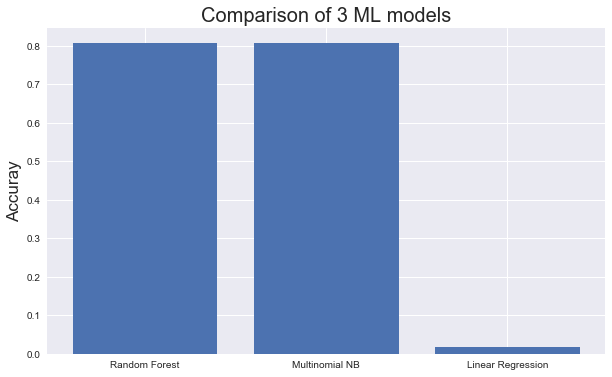

In [15]:
#Bar plot to show the comparison of the 3 models
fig = plt.figure(figsize=(10,6))    
X = np.array([1,2,3])
Y = [RF_Accuracy,MulNB_Accuracy,LR_Accuracy]
plt.bar(X, Y)
plt.xticks(X,["Random Forest","Multinomial NB","Linear Regression"] )
plt.title("Comparison of 3 ML models",fontsize=20)
plt.ylabel("Accuray", fontsize=17)